# Fairness Metrics - Trustworthy AI
German Credit Dataset - https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) \
This dataset is commonly used in fairness literature. It contains information about 1000 loan applicants and includes 20 attributes describing each applicant, e.g., credit history, purpose of the loan, loan amount requested, marital status, gender, age, job, and housing status. It also contains an additional attribute that describes the classification outcome – whether an applicant has a good or a bad credit score.
## Overview 

Is there a way to measure fairness of our machine learning model? Is our model/database biased? 

*   In this notebook, we explore the german credit database
*   A machine learning model is chosen in order to classify good/bad credit 
*   The **PPV** (positive predictive value) is calculated for both genders in order to see gender bias 
*   ***Aequitas*** is used in order to calculate the other fairness metrics \
https://github.com/dssg/aequitas 

## Reading/cleaning data

In [100]:
# Import the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

The german.data file can be read as a .csv, but we need to be careful with the separator in this case, which is a single or multiple whitespaces. 

In [101]:
df_init = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', header=None, sep='\s+')

In [102]:
# Giving names to the columns
df_init.columns = ['Checking_account', 'Duration_months', 'Credit_history', 'Purpose', 'Credit_amount', 'Savings', 
                   'Present_employment_since', 'Installment_rate', 'Personal_status_sex', 'Other_debtors',
                   'Present_residence_since','Property', 'Age', 'Other_installment_plans','Housing','existing_credits',
                   'Job','People_provide_maintenance_for','Telephone','foreign_worker', 'Target']

The dataframe has 1000 rows and 21 columns, of which 8 have integer values and 13 object ones, as we can see below:

In [4]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Checking_account                1000 non-null   object
 1   Duration_months                 1000 non-null   int64 
 2   Credit_history                  1000 non-null   object
 3   Purpose                         1000 non-null   object
 4   Credit_amount                   1000 non-null   int64 
 5   Savings                         1000 non-null   object
 6   Present_employment_since        1000 non-null   object
 7   Installment_rate                1000 non-null   int64 
 8   Personal_status_sex             1000 non-null   object
 9   Other_debtors                   1000 non-null   object
 10  Present_residence_since         1000 non-null   int64 
 11  Property                        1000 non-null   object
 12  Age                             1000 non-null   i

In [5]:
df_init.shape

(1000, 21)

In [4]:
df_init.head(10)

,Checking_account,Duration_months,Credit_history,Purpose,Credit_amount,Savings,Present_employment_since,Installment_rate,Personal_status_sex,Other_debtors,...,Property,Age,Other_installment_plans,Housing,existing_credits,Job,People_provide_maintenance_for,Telephone,foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [ ]:
df_init.isna().sum()

## Exploring Data Properties

In [5]:
# Properties of the Numerical columns
df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Present_residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
People_provide_maintenance_for,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Target,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


The data is unbalanced: 70% good credit, 30% bad credit.

In [6]:
# Target column: Good (1) or Bad (2) Credit 
df_init['Target'].value_counts()

1    700
2    300
Name: Target, dtype: int64

In [7]:
# Properties of the Non-numerical (categorical) columns
# First select the columns which would be categorical (object):
cat_cols = [col for col in df_init.columns if df_init[col].dtypes == 'O']

for col in cat_cols:
    print(df_init[col].value_counts(), "\n\n")

A14    394
A11    274
A12    269
A13     63
Name: Checking_account, dtype: int64 


A32    530
A34    293
A33     88
A31     49
A30     40
Name: Credit_history, dtype: int64 


A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: Purpose, dtype: int64 


A61    603
A65    183
A62    103
A63     63
A64     48
Name: Savings, dtype: int64 


A73    339
A75    253
A74    174
A72    172
A71     62
Name: Present_employment_since, dtype: int64 


A93    548
A92    310
A94     92
A91     50
Name: Personal_status_sex, dtype: int64 


A101    907
A103     52
A102     41
Name: Other_debtors, dtype: int64 


A123    332
A121    282
A122    232
A124    154
Name: Property, dtype: int64 


A143    814
A141    139
A142     47
Name: Other_installment_plans, dtype: int64 


A152    713
A151    179
A153    108
Name: Housing, dtype: int64 


A173    630
A172    200
A174    148
A171     22
Name: Job, dtype: int64 


A191    596
A192  

The gender and the marital status of the applicants is specified in one attribute (*Personal_status_sex*), which has five possible categorical values: single male, married male, divorced male, single female, married or divorced female. \
In all the 1000 records of this dataset there is no case of a single female applicant. \
\
**Attribute 9:** (qualitative) \
**Personal status and sex** \
A91 : male : divorced/separated - 50 values\
A92 : female : divorced/separated/married - 310 values\
A93 : male : single - 548 values\
A94 : male : married/widowed -  92 values\
A95 : female : single - none \
\
Using cross tabulation, it is possible to check the frequency of a good (1) or bad (2) credit for the unpriviliged groups: women and divorced men, in this case. Those groups are less likely to get credit than other men. 


In [8]:
# Divorced men A91 and women A92 are less likely to get credit than other men. 
pd.crosstab(df_init.Personal_status_sex, df_init.Target).apply(lambda r: r/r.sum(), axis=1)

Target,1,2
Personal_status_sex,,
A91,0.600000,0.400000
A92,0.648387,0.351613
A93,0.733577,0.266423
A94,0.728261,0.271739


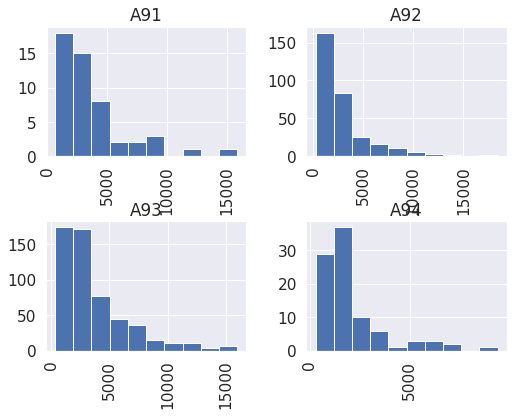

In [69]:
#A91 -> Divorced men
#A92 -> Women (married or divorced)
df_init.hist(column='Credit_amount', by='Personal_status_sex');
#plt.ylim(ymin=0,ymax=150)

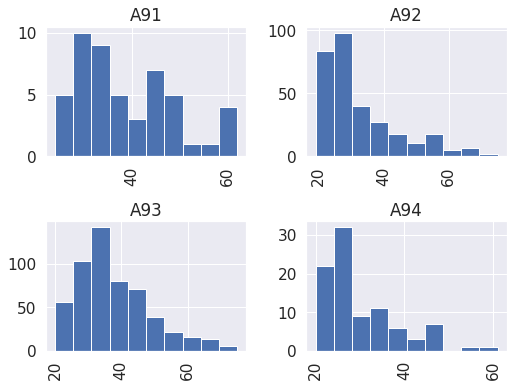

In [70]:
df_init.hist(column='Age', by='Personal_status_sex');

## Preparing the Data


In [103]:
# Getting the names of the columns that are not numerical (as we already before)
cat_cols = [col for col in df_init.columns if df_init[col].dtypes == 'O']
cat_cols

['Checking_account',
 'Credit_history',
 'Purpose',
 'Savings',
 'Present_employment_since',
 'Personal_status_sex',
 'Other_debtors',
 'Property',
 'Other_installment_plans',
 'Housing',
 'Job',
 'Telephone',
 'foreign_worker']

In [104]:
# Transforming the columns into numerical ones, using LabelEncoder.
df_num = df_init.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Creating a dataframe which is completely numerical df_num
for i in cat_cols:
  df_num[i] = le.fit_transform(df_num[i])

In [105]:
df_num.head(10)

,Checking_account,Duration_months,Credit_history,Purpose,Credit_amount,Savings,Present_employment_since,Installment_rate,Personal_status_sex,Other_debtors,...,Property,Age,Other_installment_plans,Housing,existing_credits,Job,People_provide_maintenance_for,Telephone,foreign_worker,Target
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2
5,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,1
6,3,24,2,3,2835,2,4,3,2,0,...,1,53,2,1,1,2,1,0,0,1
7,1,36,2,1,6948,0,2,2,2,0,...,2,35,2,0,1,3,1,1,0,1
8,3,12,2,4,3059,3,3,2,0,0,...,0,61,2,1,1,1,1,0,0,1
9,1,30,4,0,5234,0,0,4,3,0,...,2,28,2,1,2,3,1,0,0,2


After the numerical categorization, we have:\
**Personal status and sex** \
A91 : male : divorced/separated - **"0"**\
A92 : female : divorced/separated/married - **"1"**\
A93 : male : single - **"2"**\
A94 : male : married/widowed -  **"3"**\
A95 : female : single - none 

In [106]:
# Spliting the sample into train and test
from sklearn.model_selection import train_test_split
y=df_num.Target
X=df_num.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
X_train.shape

(750, 20)

In [108]:
# Checking the balance between train and test
y_test.value_counts()/y_train.value_counts()

1    0.340996
2    0.315789
Name: Target, dtype: float64

## Functions for Metrics
**show_results(y_test, y_preds):**\
Since a classifier model is going to be used, it desirable to have some organized metrics, as MCC score, the classification report and confusion matrix. \
**PPV(group)**:\
Another metric we want to verify is the PPV (Positive Predictive Value or Precision) for both groups in our dataset: the reference and the privileged ones. 

In [109]:
from sklearn import tree
from sklearn.metrics import classification_report, matthews_corrcoef, confusion_matrix
import xgboost as xgb
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(8,6)})

In [110]:
# This is a function that returns some metrics for the classifier.
def show_results(y_test, y_preds):
  """ This function:
  - prints the MCC score
  - prints a classification report 
  - prints a heatmap colored confusion matrix 
  """
  print(f'mcc score: {matthews_corrcoef(y_test, preds)}')
  print(classification_report(y_test, preds))

  conf_mat = confusion_matrix(y_test, y_preds) 
  label_names = y_test.astype('category').cat.categories
  df_cm = pd.DataFrame(conf_mat, label_names, label_names) 

  sns.set(font_scale=1.4) 
  sns.heatmap(df_cm, annot=True, fmt='d', cmap="GnBu")

In [111]:
# This is a function that calculates the PPV Fairness metric
# PPV = TP/(Predicted Positives)
# We can use group = 1 for women, since the categorical value for woman is 1 and group = 0 for men, 
# which are all the other categories.
def PPV(group):
    TP = 0
    Positives = 0
    y_test1 = y_test.reset_index(drop=True)
    X_test1 = X_test.reset_index(drop=True)
    
    for i in range(len(preds)): 
      if group==1:
        if y_test1[i]==preds[i]==X_test1['Personal_status_sex'].iloc[i]==1:
          TP += 1
        if preds[i]==X_test1['Personal_status_sex'].iloc[i]==1:
          Positives += 1
      
      if group==0:
        if y_test1[i]==preds[i]==1 and X_test1['Personal_status_sex'].iloc[i]!=1:
          TP += 1
        if preds[i]==1 and X_test1['Personal_status_sex'].iloc[i]!=1:
          Positives += 1

    PPV = TP/Positives  

    return(PPV)


## Training the Model - XGBoost

In [112]:
# Model - XGBoost - First we need to prepare the data for XGBoost:
xgboost_train_data = xgb.DMatrix(X_train, label=y_train.astype('category').cat.codes)

mcc score: 0.42333033065612286
              precision    recall  f1-score   support

           1       0.81      0.90      0.85       178
           2       0.67      0.47      0.55        72

    accuracy                           0.78       250
   macro avg       0.74      0.69      0.70       250
weighted avg       0.77      0.78      0.77       250



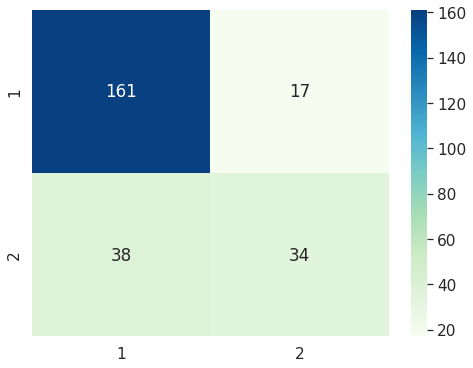

In [113]:
# XGBClassifier - XGB Classifier - a boosted ensemble of classifiers
reg = xgb.XGBClassifier()
xgb_clf = reg.fit(X_train, y_train)

preds = xgb_clf.predict(X_test)
show_results(y_test, preds) 

In [114]:
#Fairness Metric PPV (precision) for women 
PPV(1)

0.7868852459016393

In [115]:
#Fairness Metric PPV (precision) for men 
PPV(0)

0.8188405797101449

Here we can see the difference between the positive precisions of the model for women (around 78%) and men (around 82%).\
Below, we will see that Aequitas can be used to calculate several fairness metrics without having to calculate each of them. 

## Aequitas Fairness Metrics



### Preparing the data for Aequitas

To get started with **Aequitas**, preprocessing input data is needed. Input data has slightly different requirements depending on whether you are using Aequitas via the *webapp*, *CLI* or *Python package*. 

If you plan to bin or discretize continuous features manually, note that get_crosstabs() expects attribute columns to be of type '**string**,' so don't forget to recast any 'categorical' type columns!

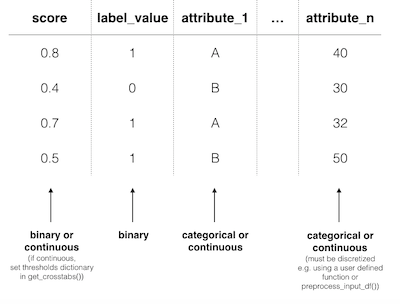

In [116]:
# Aequitas Fairness Metrics 
# First we need to prepare the table with preds, y_test and X_test
df_fair = X_test.copy()
df_fair['score'] = preds
df_fair['label_value'] = y_test
df_fair = df_fair[['score','label_value','Checking_account', 'Duration_months', 'Credit_history', 
                 'Purpose', 'Credit_amount', 'Savings', 'Present_employment_since', 'Installment_rate', 
                 'Personal_status_sex', 'Other_debtors','Present_residence_since','Property', 'Age', 
                 'Other_installment_plans','Housing','existing_credits','Job','People_provide_maintenance_for',
                 'Telephone','foreign_worker']]
df_fair.score.replace(2,0, inplace=True) # replace 2 by 0(zero)
df_fair.label_value.replace(2,0, inplace=True) # replace 2 by 0(zero)
# since the female group is "1", everybody else is set to "0" 
df_fair.Personal_status_sex.replace(2,0, inplace=True) 
df_fair.Personal_status_sex.replace(3,0, inplace=True) 

In [117]:
# Verify the counts: 1 - female, 0 - male
df_fair.Personal_status_sex.value_counts()

0    177
1     73
Name: Personal_status_sex, dtype: int64

In [118]:
X_test.Personal_status_sex.value_counts()

2    134
1     73
3     23
0     20
Name: Personal_status_sex, dtype: int64

**score**\
By default, **Aequitas** assumes the score column is a binary decision (0 or 1). If the score column contains a non-binary score (e.g. the output from a logistic regression applied to the data), the user sets a threshold to determine the binary decision. \

**label_value**\
This is the ground truth value of a binary decision. The data must be binary (0 or 1).

**attributes** (e.g. race, sex, age, income)\
Group columns can be categorical or continuous. If categorical, Aequitas will produce crosstabs with bias metrics for each group_level. If continuous, Aequitas will first bin the data into quartiles.



In [119]:
# Make sure that categorical columns are of type 'string'
    
col_names = ['Checking_account', 'Credit_history', 'Purpose', 'Savings',
       'Present_employment_since', 'Personal_status_sex', 'Other_debtors',
       'Property', 'Other_installment_plans', 'Housing', 'Job', 'Telephone',
       'foreign_worker']
for col in col_names:
  df_fair[col] = df_fair[col].astype(str)

In [123]:
df_fair.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 521 to 286
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   score                           250 non-null    int64 
 1   label_value                     250 non-null    int64 
 2   Checking_account                250 non-null    object
 3   Duration_months                 250 non-null    int64 
 4   Credit_history                  250 non-null    object
 5   Purpose                         250 non-null    object
 6   Credit_amount                   250 non-null    int64 
 7   Savings                         250 non-null    object
 8   Present_employment_since        250 non-null    object
 9   Installment_rate                250 non-null    int64 
 10  Personal_status_sex             250 non-null    object
 11  Other_debtors                   250 non-null    object
 12  Present_residence_since         250 non-null    

In [120]:
df_fair.head()

,score,label_value,Checking_account,Duration_months,Credit_history,Purpose,Credit_amount,Savings,Present_employment_since,Installment_rate,...,Present_residence_since,Property,Age,Other_installment_plans,Housing,existing_credits,Job,People_provide_maintenance_for,Telephone,foreign_worker
521,1,0,0,18,2,4,3190,0,2,2,...,2,0,24,2,1,1,2,1,0,0
737,0,1,0,18,2,0,4380,1,2,3,...,4,2,35,2,1,1,1,2,1,0
740,0,1,0,24,1,0,2325,1,3,2,...,3,2,32,0,1,1,2,1,0,0
660,1,1,2,12,2,4,1297,0,2,3,...,4,0,23,2,0,1,2,1,0,0
411,1,1,3,33,4,1,7253,0,3,3,...,2,2,35,2,1,2,3,1,1,0


In [127]:
# building a dataframe to use in the Aequitas webapp
df_webaequitas=df_fair.copy()
df_webaequitas=df_webaequitas.drop(['Checking_account', 'Credit_history', 
                                    'Purpose', 'Savings', 'Present_employment_since', 
                                    'Other_debtors', 'Property', 'Other_installment_plans', 
                                    'Housing', 'Job', 'Telephone', 'foreign_worker'], axis=1)
df_webaequitas.Personal_status_sex.replace("0","male", inplace=True) 
df_webaequitas.Personal_status_sex.replace("1","female", inplace=True)
df_webaequitas.Personal_status_sex.value_counts()

male      177
female     73
Name: Personal_status_sex, dtype: int64

In [137]:
TP=0
Positives=0
for i in range(df_webaequitas.shape[0]): 
        if df_webaequitas['score'].iloc[i]==df_webaequitas['label_value'].iloc[i]==1 and df_webaequitas['Personal_status_sex'].iloc[i]=="female":
          TP += 1
        if df_webaequitas['score'].iloc[i]==1 and df_webaequitas['Personal_status_sex'].iloc[i]=="female":
          Positives += 1  

TP/Positives

0.7868852459016393

In [128]:
import csv
df_webaequitas.to_csv('/content/df_aequitas.csv', index=False)
#df_webaequitas.to_csv('/content/df_aequitas.csv', quoting=csv.QUOTE_NONNUMERIC, index=False)

### Installing Aequitas

In [28]:
!pip install aequitas
import aequitas

     |████████████████████████████████| 2.2 MB 23.1 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 456 kB 49.3 MB/s 
     |████████████████████████████████| 596 kB 43.6 MB/s 
     |████████████████████████████████| 727 kB 24.2 MB/s 
     |████████████████████████████████| 161 kB 65.0 MB/s 
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 97 kB 7.6 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 2.7 MB 54.2 MB/s 
  Created wheel for Flask-Bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460123 sha256=92d40846d0d659af9ddbef01f8577b1023963a902a2c82e91c650e0ba5b61fb0
  Stored in directory: /root/.cache/pip/wheels/67/a2/d6/50d039c9b59b4caca6d7b53839c8100354a52ab7553d2456eb
  Created wheel for markdown2: filename=markdown2-2.3.5-py3-none-any.whl size=33327 sha256=645ecfd37b1da5d778f8af31977011891cfe59936f6e8e1f44f392c23bd

In [30]:
from aequitas.preprocessing import preprocess_input_df

df, _ = preprocess_input_df(df_fair)

In [ ]:
df.head()

In [32]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

In [72]:
attributes_and_reference_groups={'Personal_status_sex':'0'} # '0' - male is our reference group
attributes_to_audit = list(attributes_and_reference_groups.keys())

In [73]:
metrics = ['ppr']

In [71]:
disparity_tolerance = 1.2

In [74]:
# Initialize Aequitas
g = Group()
b = Bias()

# get_crosstabs returns a dataframe of the group counts and group value bias metrics.
xtab, _ = g.get_crosstabs(df, attr_cols=attributes_to_audit)
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict=attributes_and_reference_groups)

get_disparity_predefined_group()


In [75]:
ap.disparity(bdf, metrics, 'Personal_status_sex', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

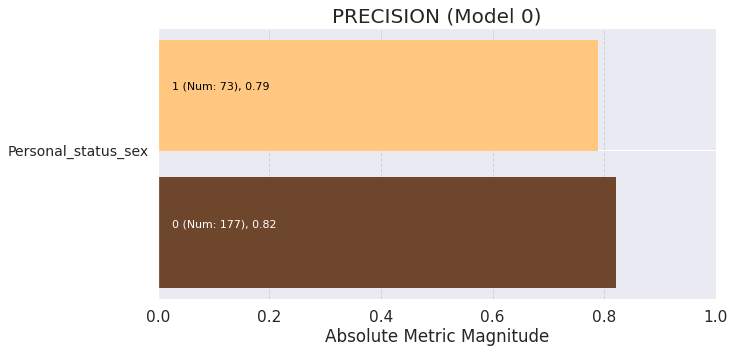

In [76]:
from aequitas.plotting import Plot
    
aqp = Plot()
fpr_plot = aqp.plot_group_metric(xtab, 'precision')

In [77]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[['attribute_name', 'attribute_value'] + absolute_metrics]

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Personal_status_sex,0,0.889764,0.500000,0.358974,0.181159,0.500000,0.110236,0.641026,0.818841,0.693467,0.779661,0.717514
1,Personal_status_sex,1,0.941176,0.409091,0.250000,0.213115,0.590909,0.058824,0.750000,0.786885,0.306533,0.835616,0.698630


In [78]:
bdf[['attribute_name', 'attribute_value'] + b.list_disparities(bdf)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Personal_status_sex,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00
1,Personal_status_sex,1,0.442029,1.071769,0.960975,1.176393,0.696429,1.181818,0.533613,1.057782,0.818182,1.17


## Conclusion
Aequitas is a good tool to calculate the fairness metrics and compare them for the privileged and unprivileged groups. In this notebook, metrics for male and female groups were compared using the german data for credit score. The same analysis could be done with the group of divorced men in order to check for possible bias against them. 


---



#Fairness through Unawareness
The method consists in removing the column that contains/generates the BIAS. In this case, we will remove the Personal_status_sex column. After training the model without the gender/marital status information, we can compare the fairness metrics. 

In [79]:
# Fairness through Unawareness: Removing the Sensitive column
Removedcol = X_test.Personal_status_sex # we will need this column later 
X_train=X_train.drop(['Personal_status_sex'], axis=1)
X_test=X_test.drop(['Personal_status_sex'], axis=1)


In [81]:
X_train.shape

(750, 19)

In [82]:
# Model - XGBoost - First we need to prepare the data for XGBoost:
xgboost_train_data = xgb.DMatrix(X_train, label=y_train.astype('category').cat.codes)

mcc score: 0.4357930791898005
              precision    recall  f1-score   support

           1       0.81      0.90      0.86       178
           2       0.67      0.49      0.56        72

    accuracy                           0.78       250
   macro avg       0.74      0.70      0.71       250
weighted avg       0.77      0.78      0.77       250



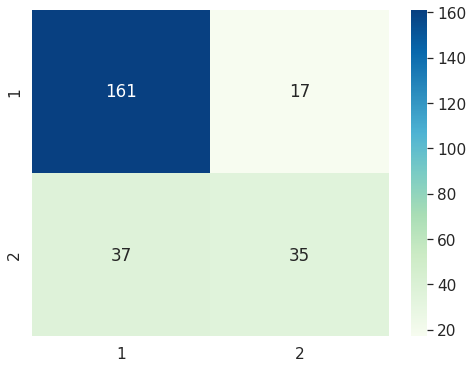

In [83]:
# XGBClassifier - XGB Classifier - a boosted ensemble of classifiers
reg = xgb.XGBClassifier()
xgb_clf = reg.fit(X_train, y_train)

preds = xgb_clf.predict(X_test)
show_results(y_test, preds) 

In [84]:
X_test['Personal_status_sex'] = Removedcol

In [85]:
X_test.head()

,Checking_account,Duration_months,Credit_history,Purpose,Credit_amount,Savings,Present_employment_since,Installment_rate,Other_debtors,Present_residence_since,Property,Age,Other_installment_plans,Housing,existing_credits,Job,People_provide_maintenance_for,Telephone,foreign_worker,Personal_status_sex
521,0,18,2,4,3190,0,2,2,0,2,0,24,2,1,1,2,1,0,0,1
737,0,18,2,0,4380,1,2,3,0,4,2,35,2,1,1,1,2,1,0,2
740,0,24,1,0,2325,1,3,2,0,3,2,32,0,1,1,2,1,0,0,2
660,2,12,2,4,1297,0,2,3,0,4,0,23,2,0,1,2,1,0,0,3
411,3,33,4,1,7253,0,3,3,0,2,2,35,2,1,2,3,1,1,0,2


In [86]:
# Aequitas Fairness Metrics 
# First we need to prepare the table with preds, y_test and X_test
df_fair = X_test.copy()
df_fair['score'] = preds
df_fair['label_value'] = y_test
df_fair = df_fair[['score','label_value','Checking_account', 'Duration_months', 'Credit_history', 
                 'Purpose', 'Credit_amount', 'Savings', 'Present_employment_since', 'Installment_rate', 
                 'Personal_status_sex', 'Other_debtors','Present_residence_since','Property', 'Age', 
                 'Other_installment_plans','Housing','existing_credits','Job','People_provide_maintenance_for',
                 'Telephone','foreign_worker']]
df_fair.score.replace(2,0, inplace=True) # replace 2 by 0(zero)
df_fair.label_value.replace(2,0, inplace=True) # replace 2 by 0(zero) 
df_fair.Personal_status_sex.replace(2,0, inplace=True) 
df_fair.Personal_status_sex.replace(3,0, inplace=True) 

In [87]:
# Verify the counts: should have 
df_fair.Personal_status_sex.value_counts()

0    177
1     73
Name: Personal_status_sex, dtype: int64

In [88]:
X_test.Personal_status_sex.value_counts()

2    134
1     73
3     23
0     20
Name: Personal_status_sex, dtype: int64

In [89]:
# Make sure that categorical columns are of type 'string'
    
col_names = ['Checking_account', 'Credit_history', 'Purpose', 'Savings',
       'Present_employment_since', 'Personal_status_sex', 'Other_debtors',
       'Property', 'Other_installment_plans', 'Housing', 'Job', 'Telephone',
       'foreign_worker']
for col in col_names:
  df_fair[col] = df_fair[col].astype(str)

In [90]:
from aequitas.preprocessing import preprocess_input_df

df, _ = preprocess_input_df(df_fair)

In [91]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

In [92]:
attributes_and_reference_groups={'Personal_status_sex':'0'}
attributes_to_audit = list(attributes_and_reference_groups.keys())

In [93]:
metrics = ['precision']

In [94]:
disparity_tolerance = 1.20

In [95]:
# Initialize Aequitas
g = Group()
b = Bias()

# get_crosstabs returns a dataframe of the group counts and group value bias metrics.
xtab, _ = g.get_crosstabs(df, attr_cols=attributes_to_audit)
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict=attributes_and_reference_groups)

get_disparity_predefined_group()


In [96]:
ap.disparity(bdf, metrics, 'Personal_status_sex', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [97]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[['attribute_name', 'attribute_value'] + absolute_metrics]

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Personal_status_sex,0,0.889764,0.520000,0.35,0.175182,0.480000,0.110236,0.65,0.824818,0.691919,0.774011,0.717514
1,Personal_status_sex,1,0.941176,0.409091,0.25,0.213115,0.590909,0.058824,0.75,0.786885,0.308081,0.835616,0.698630


In [98]:
bdf[['attribute_name', 'attribute_value'] + b.list_disparities(bdf)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Personal_status_sex,0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Personal_status_sex,1,0.445255,1.079592,0.954011,1.21653,0.714286,1.231061,0.533613,1.057782,0.786713,1.153846
